## Import necessary library

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## Read and Import Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\Data Analysis\Video_Games project\dataset\Video_Games_Sales_as_at_22_Dec_2016.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [26]:
data.Platform.value_counts()

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

- column contain missing value (Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating)

## Clean Data

In [38]:
Number_missing_Rating=data.Rating.isnull().sum()
Number_missing_Rating

np.int64(6767)

In [37]:
data.Rating.value_counts()

Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [39]:
missing_percentage_Rating=(Number_missing_Rating / len(data)) * 100
missing_percentage_Rating

np.float64(40.4797511515224)

In [40]:
data['Rating'].fillna('Unknown',inplace=True)

In [5]:
Number_missing_Publisher=data.Publisher.isnull().sum()
Number_missing_Publisher

np.int64(54)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [6]:
missing_percentage_publisher=(Number_missing_Publisher / len(data)) * 100
missing_percentage_publisher

np.float64(0.32298582451103536)

In [8]:
data['Publisher'].fillna('Unknown',inplace=True)
data.Publisher.isnull().sum()

np.int64(0)

In [10]:
Number_missing_Critic_Score=data.Critic_Score.isnull().sum()
Number_missing_Critic_Score

np.int64(8582)

In [11]:
missing_percentage_Critic=(Number_missing_Critic_Score / len(data)) * 100
missing_percentage_Critic

np.float64(51.33082122136492)

In [12]:
data.drop(columns=['Critic_Score', 'User_Score'],inplace=True)

In [14]:
data.drop(columns=['Critic_Count', 'User_Count'],inplace=True)

In [18]:
data.dropna(subset=['Name'],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Developer        10096 non-null  object 
 11  Rating           9950 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


## Data Analysis

# Find the top 10 best-selling games globally

In [24]:
top_selling_games=data[['Name','Global_Sales']].sort_values(by='Global_Sales',ascending=False).head(10)
top_selling_games

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.92
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


In [25]:
top_selling_platforms=data.loc[data['Name'].isin([
    'Wii Sports', 
    'Super Mario Bros.', 
    'Mario Kart Wii', 
    'Wii Sports Resort', 
    'Pokemon Red/Pokemon Blue', 
    'Tetris', 
    'New Super Mario Bros.', 
    'Wii Play', 
    'New Super Mario Bros. Wii'
]),['Name', 'Platform', 'Global_Sales']]
top_selling_platforms

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.53
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,29.80
7,Wii Play,Wii,28.92
8,New Super Mario Bros. Wii,Wii,28.32
157,Tetris,NES,5.58


# Impact of Game Genre on Global Sales

Through the analysis conducted, it is clear that **game genre** has a significant impact on global sales. The highest-selling games encompass a variety of genres, including:
- Sports games (e.g., Wii Sports)
- Platform games (e.g., Super Mario Bros.)
- RPGs (e.g., Pokemon Red/Pokemon Blue)
- Racing games (e.g., Mario Kart Wii)
- Puzzle games (e.g., Tetris)

This indicates that the most popular genres among players lead to higher sales. Therefore, it can be stated that selecting the right game genre plays a crucial role in its commercial success.


In [27]:
data.Genre.value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [28]:
top_selling_Genre=data.loc[data['Name'].isin([
    'Wii Sports', 
    'Super Mario Bros.', 
    'Mario Kart Wii', 
    'Wii Sports Resort', 
    'Pokemon Red/Pokemon Blue', 
    'Tetris', 
    'New Super Mario Bros.', 
    'Wii Play', 
    'New Super Mario Bros. Wii'
]),['Name', 'Genre', 'Global_Sales']]
top_selling_Genre

,Name,Genre,Global_Sales
0,Wii Sports,Sports,82.53
1,Super Mario Bros.,Platform,40.24
2,Mario Kart Wii,Racing,35.52
3,Wii Sports Resort,Sports,32.77
4,Pokemon Red/Pokemon Blue,Role-Playing,31.37
5,Tetris,Puzzle,30.26
6,New Super Mario Bros.,Platform,29.80
7,Wii Play,Misc,28.92
8,New Super Mario Bros. Wii,Platform,28.32
157,Tetris,Puzzle,5.58


In [31]:
genre_sales=data.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales.sort_values(by='Global_Sales',ascending=False)

,Genre,Global_Sales
0,Action,1745.27
10,Sports,1332.00
8,Shooter,1052.94
7,Role-Playing,934.40
4,Platform,828.08
3,Misc,803.18
6,Racing,728.90
2,Fighting,447.48
9,Simulation,390.42
5,Puzzle,243.02


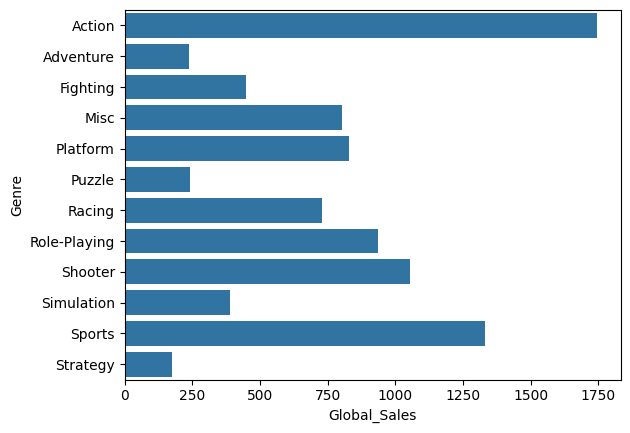

In [33]:
sns.barplot(x='Global_Sales',y='Genre',data=genre_sales)
plt.show()

In [42]:
data.Rating.value_counts()

Rating
Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

In [46]:
sales_by_rating=data.groupby('Rating')['Global_Sales'].sum().reset_index()
sales_by_rating.sort_values(by='Global_Sales',ascending=False,inplace=True)
sales_by_rating

,Rating,Global_Sales
8,Unknown,2848.79
1,E,2436.90
7,T,1494.40
5,M,1473.84
2,E10+,655.81
4,K-A,4.33
0,AO,1.95
3,EC,1.78
6,RP,0.08


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'E'),
  Text(2, 0, 'T'),
  Text(3, 0, 'M'),
  Text(4, 0, 'E10+'),
  Text(5, 0, 'K-A'),
  Text(6, 0, 'AO'),
  Text(7, 0, 'EC'),
  Text(8, 0, 'RP')])

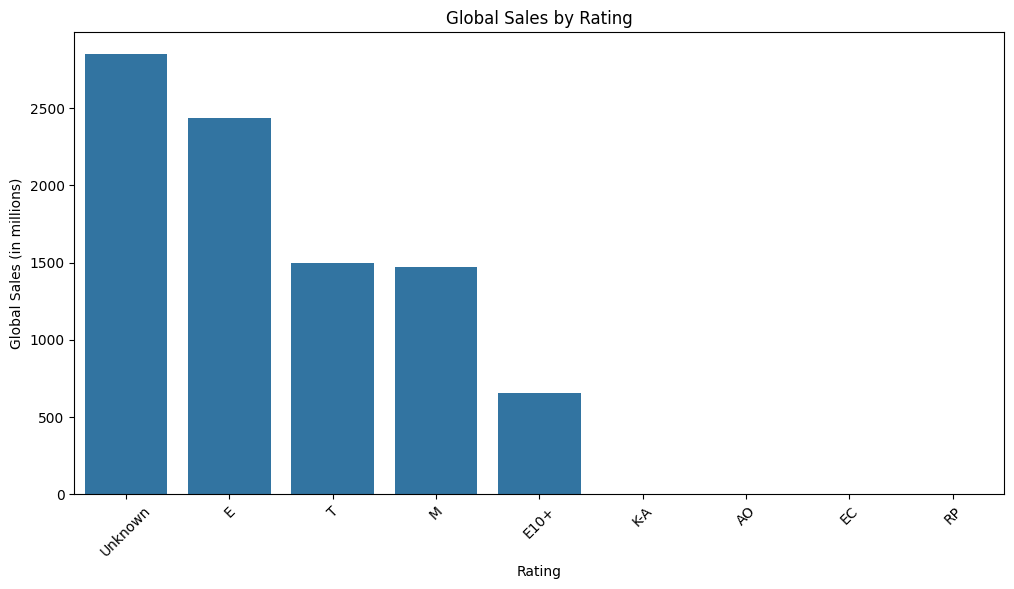

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Global_Sales', data=sales_by_rating)
plt.title('Global Sales by Rating')
plt.xlabel('Rating')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)


In [50]:
top_selling_Genre=data.loc[data['Name'].isin([
    'Wii Sports', 
    'Super Mario Bros.', 
    'Mario Kart Wii', 
    'Wii Sports Resort', 
    'Pokemon Red/Pokemon Blue', 
    'Tetris', 
    'New Super Mario Bros.', 
    'Wii Play', 
    'New Super Mario Bros. Wii'
]),['Name', 'Rating', 'Global_Sales']]
top_selling_Genre

,Name,Rating,Global_Sales
0,Wii Sports,E,82.53
1,Super Mario Bros.,Unknown,40.24
2,Mario Kart Wii,E,35.52
3,Wii Sports Resort,E,32.77
4,Pokemon Red/Pokemon Blue,Unknown,31.37
5,Tetris,Unknown,30.26
6,New Super Mario Bros.,E,29.80
7,Wii Play,E,28.92
8,New Super Mario Bros. Wii,E,28.32
157,Tetris,Unknown,5.58


In [51]:
unknown_genre=data[data['Rating']=='Unknown']['Genre'].value_counts()
unknown_genre

Genre
Action          1182
Misc             868
Adventure        857
Sports           839
Role-Playing     723
Fighting         411
Racing           377
Strategy         344
Platform         319
Simulation       305
Shooter          304
Puzzle           238
Name: count, dtype: int64

# Analysis of Game Ratings and Global Sales

The analysis indicates that the rating of a game significantly impacts its global sales. Games with a well-known rating, such as "E" (Everyone), tend to achieve higher sales figures. Notably, titles like "Wii Sports," "Mario Kart Wii," and "Wii Sports Resort" exemplify this trend with substantial sales.

However, it's important to recognize that other factors may also contribute to a game's success. Several games, such as "Super Mario Bros." and "Tetris," carry an "Unknown" rating yet still maintain impressive sales figures. This suggests that while the rating plays a role, elements like brand recognition, gameplay quality, and marketing effectiveness can also influence a game's performance in the market.

In conclusion, while game ratings are an essential factor in determining sales, they are not the sole determinant of a game's success. The interplay of various elements ultimately shapes a game's popularity and commercial success.


In [58]:
data.Publisher.value_counts().head(15)

Publisher
Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Unknown                                    255
Warner Bros. Interactive Entertainment     235
Name: count, dtype: int64

In [56]:
publisher_sales=data.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_sales.sort_values(ascending=False,inplace=True,by='Global_Sales')
publisher_sales.head(10)

,Publisher,Global_Sales
361,Nintendo,1788.81
139,Electronic Arts,1116.96
21,Activision,731.16
458,Sony Computer Entertainment,606.48
528,Ubisoft,471.61
497,Take-Two Interactive,403.82
491,THQ,338.44
277,Konami Digital Entertainment,282.39
448,Sega,270.35
349,Namco Bandai Games,254.62


In [62]:
top_selling_Publisher=data.loc[data['Name'].isin([
    'Wii Sports', 
    'Super Mario Bros.', 
    'Mario Kart Wii', 
    'Wii Sports Resort', 
    'Pokemon Red/Pokemon Blue', 
    'Tetris', 
    'New Super Mario Bros.', 
    'Wii Play', 
    'New Super Mario Bros. Wii'
]),['Name', 'Publisher', 'Global_Sales']]
top_selling_Publisher

,Name,Publisher,Global_Sales
0,Wii Sports,Nintendo,82.53
1,Super Mario Bros.,Nintendo,40.24
2,Mario Kart Wii,Nintendo,35.52
3,Wii Sports Resort,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,31.37
5,Tetris,Nintendo,30.26
6,New Super Mario Bros.,Nintendo,29.80
7,Wii Play,Nintendo,28.92
8,New Super Mario Bros. Wii,Nintendo,28.32
157,Tetris,Nintendo,5.58


# The Importance of Publishers in Global Sales

Publishers play a crucial role in the success of video games, significantly influencing their global sales. Their responsibilities include marketing, distribution, and financial backing, which can directly affect a game's visibility and accessibility to consumers.

## Key Points

1. **Marketing and Promotion**: Publishers invest heavily in marketing campaigns to promote their games. Effective advertising strategies can create buzz and anticipation, leading to higher initial sales. For instance, renowned publishers like Nintendo and Electronic Arts leverage their brand recognition to attract consumers.

2. **Distribution Networks**: Established publishers often have extensive distribution networks that ensure games are readily available across various platforms and regions. This accessibility can dramatically increase sales figures, especially for popular titles.

3. **Financial Support**: Publishers provide the necessary funding for game development, which allows developers to create high-quality content. Games that are well-developed and polished tend to perform better in the market.

4. **Post-Launch Support**: Many publishers offer post-launch support through updates, downloadable content (DLC), and community engagement. This ongoing support can extend the lifespan of a game and maintain sales momentum.


